# <font color='orange'> Lab | Random variable distributions </font>

- Instructions
- Get the numerical variables from our dataset.
- Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
- Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import QuantileTransformer

In [59]:
data=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [60]:
# Get the numerical variables from our dataset.
numerical=data.select_dtypes('number')
numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [61]:
# Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result
numerical_log=np.log(numerical)
    

numerical_log=numerical_log.replace([np.inf, -np.inf], np.nan).dropna(subset=numerical.columns, how="all")
numerical_log



,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,7.924260,10.937988,4.234107,3.465736,1.609438,NaN,0.000000,5.952753
1,8.850738,NaN,4.543295,2.564949,3.737670,NaN,2.079442,7.031268
2,9.464008,10.794809,4.682131,2.890372,3.637586,NaN,0.693147,6.339428
3,8.941920,NaN,4.663439,2.890372,4.174387,NaN,1.945910,6.272653
4,7.942253,10.688211,4.290459,2.484907,3.784190,NaN,0.000000,4.928202
...,...,...,...,...,...,...,...,...
9129,10.060747,11.183602,4.290459,2.890372,4.488636,NaN,0.693147,5.289452
9130,8.038031,9.980634,4.369448,2.639057,3.332205,NaN,0.000000,5.938064
9131,9.007476,NaN,4.442651,2.197225,3.610918,1.098612,0.693147,6.673026
9132,8.925912,9.996112,4.564348,3.526361,1.098612,NaN,1.098612,6.538429


In [62]:
# Aplicamos QuantileTransformer
Quantile = QuantileTransformer(output_distribution='normal')
Quantile=Quantile.fit_transform(numerical)
Quantile=pd.DataFrame(Quantile)
Quantile=Quantile.set_axis(['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints','Number of Policies','Total Claim Amount'], axis=1)
Quantile.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,-1.155230,0.508348,-0.621099,1.545927,-1.597698,-5.199338,-5.199338,0.007403
1,0.207300,-5.199338,0.252311,-0.084155,-0.161281,-5.199338,1.501861,1.873468
2,1.071324,0.339282,0.639462,0.296607,-0.263985,-5.199338,-0.046436,0.754505
3,0.354562,-5.199338,0.574595,0.296607,0.486480,-5.199338,1.220640,0.597280
4,-1.107094,0.236492,-0.278302,-0.161281,-0.103057,-5.199338,-5.199338,-1.103465


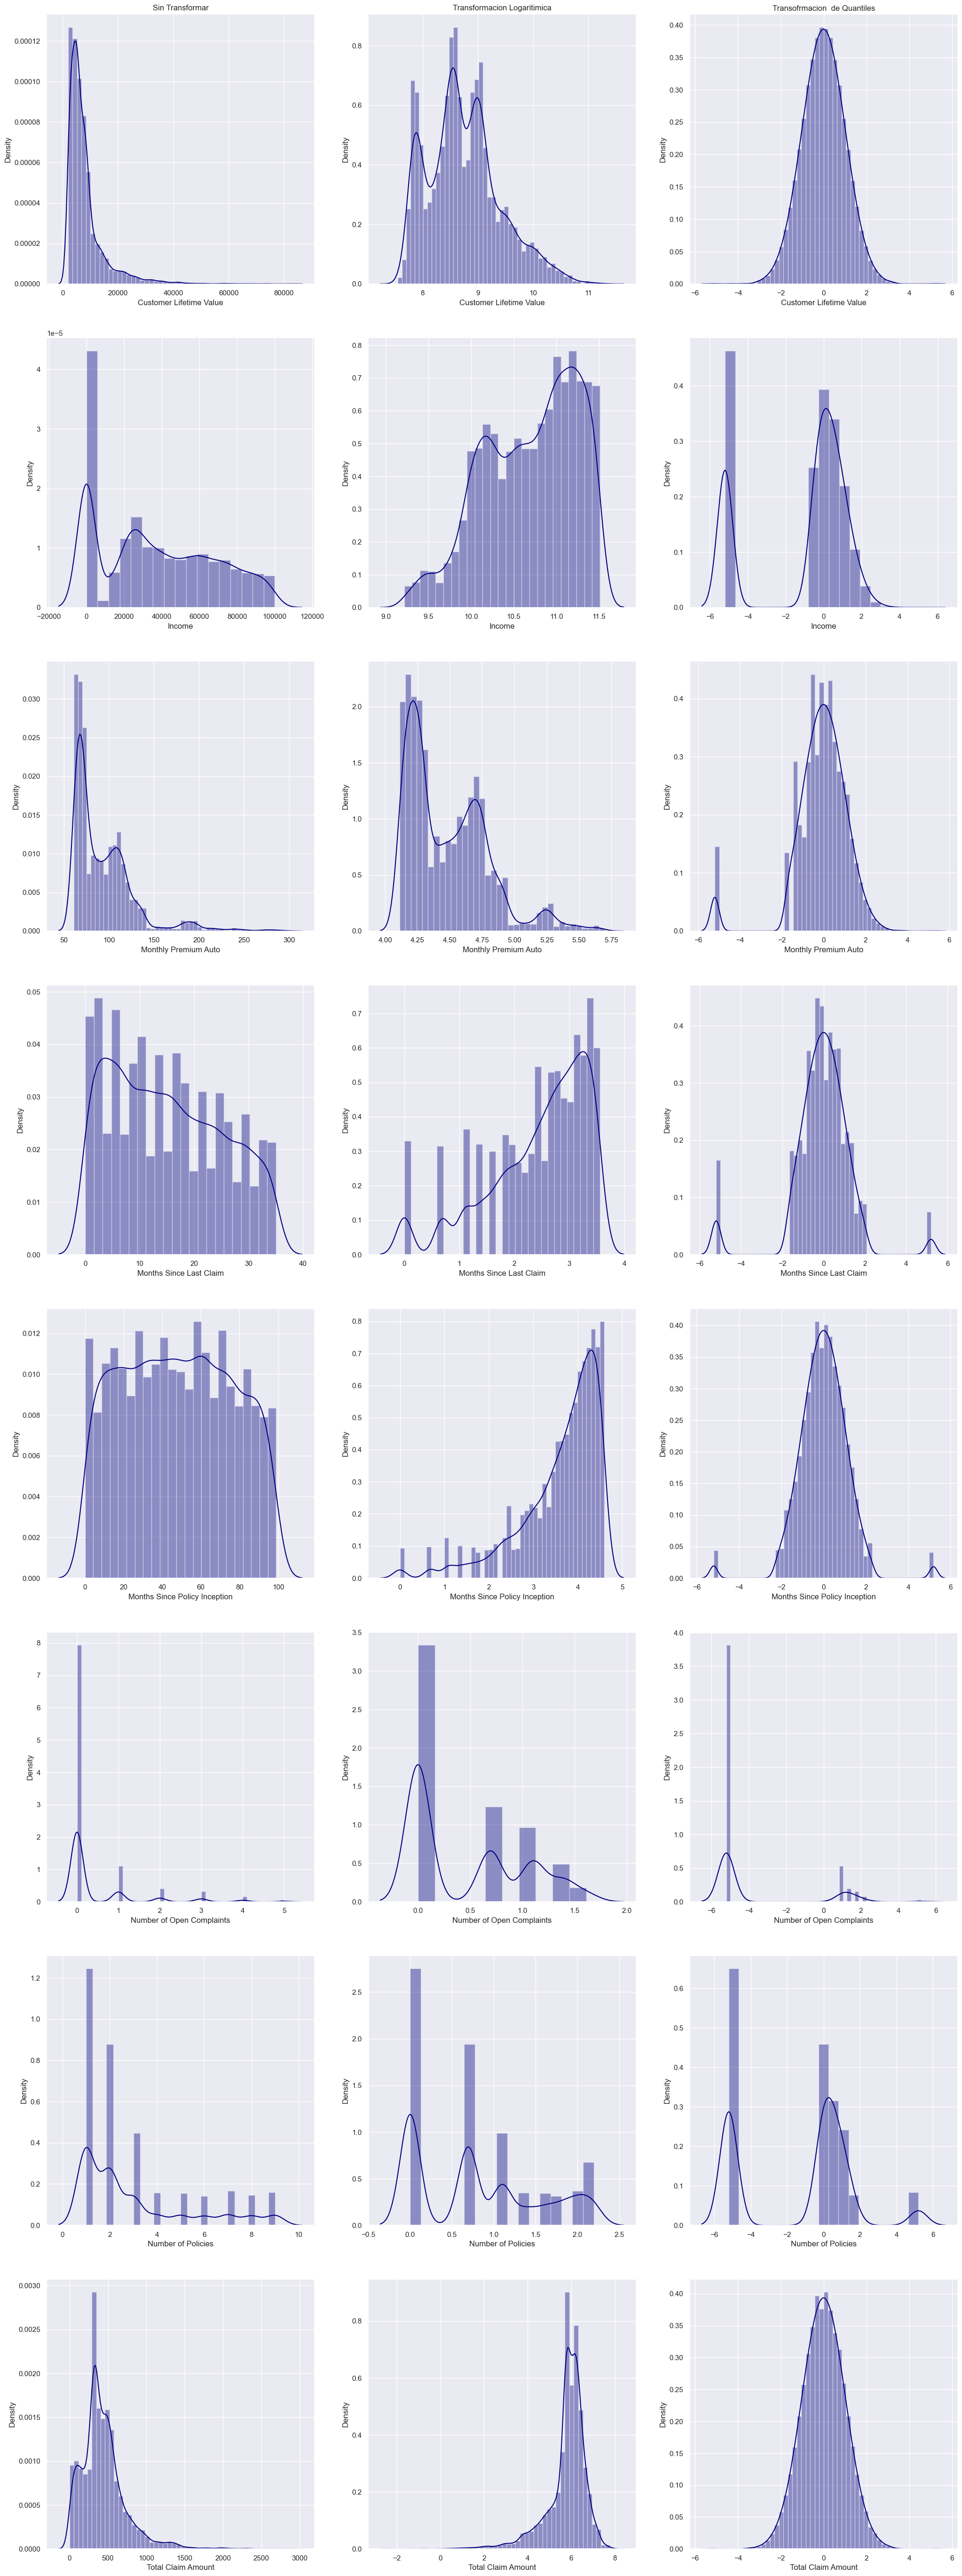

In [63]:
fig, ax = plt.subplots(nrows=len(numerical.columns), ncols=3, figsize=(25,70))
for i,col in enumerate(numerical.columns):
        sns.distplot(numerical.iloc[:,i], ax = ax[i][0], color='navy')
        sns.distplot(numerical_log.iloc[:,i], ax = ax[i][1], color='navy')
        sns.distplot(Quantile.iloc[:,i], ax = ax[i][2], color='navy')
        ax[0][0].set_title ('Sin Transformar')
        ax[0][1].set_title ('Transformacion Logaritimica')
        ax[0][2].set_title ('Transofrmacion  de Quantiles')

In [64]:
# La transformacion que acerca mas a nuestra data a una nrmal, es la Transformacion de Quantiles